<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Time-frequency analysis</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;"></p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

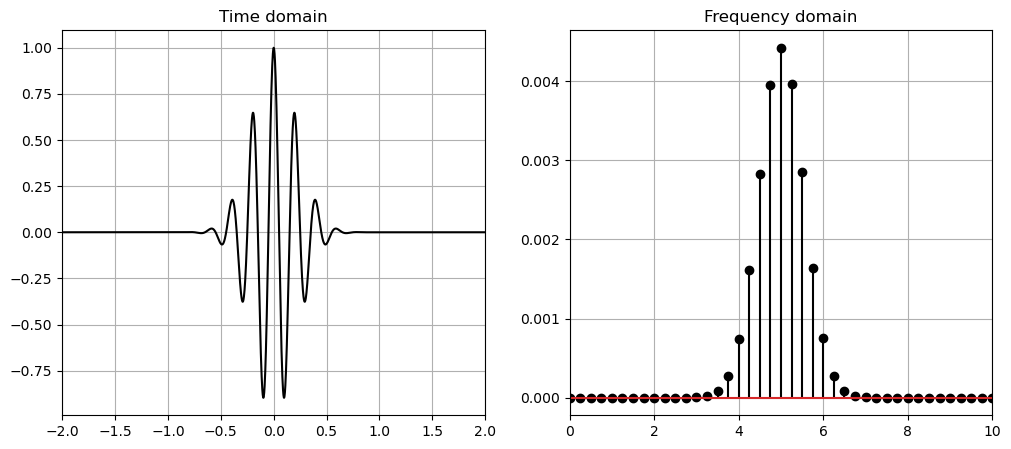

In [57]:
def createRealValueWavelet(t, f, w):
    return np.cos(2*np.pi*f*t)*np.exp(-4*np.log(2)*t**2 / w**2)

def createComplexValueWavelet(t, f, w):
    return np.exp(1j*2*np.pi*f*t)*np.exp(-4*np.log(2)*t**2 / w**2)

samplingRate = 500
t = np.arange(-2*samplingRate, 2*samplingRate+1/samplingRate) / samplingRate
points = len(t)

f = 5
w = .5
y = createRealValueWavelet(t, f, w)

# power spectrum
yX = np.abs( np.fft.fft(y/points) )**2
hz = np.linspace(0, samplingRate/2, int(points/2+1))

fig,ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(t, y, 'k')
ax[0].set_xlim((t[0], t[-1]))
ax[0].set_title('Time domain')
ax[0].grid()

ax[1].stem(hz, yX[:len(hz)], 'k')
ax[1].set_xlim((0, 10))
ax[1].set_title('Frequency domain')
ax[1].grid()

plt.show()

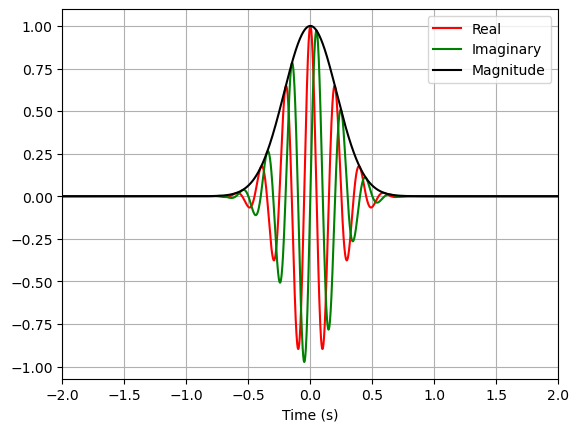

In [72]:
samplingRate = 500
t = np.arange(-2*samplingRate, 2*samplingRate+1/samplingRate) / samplingRate
points = len(t)

f = 5
w = .5
y = createComplexValueWavelet(t, f, w)

plt.plot(t, y.real, 'r', label='Real')
plt.plot(t, y.imag, 'g', label='Imaginary')
plt.plot(t, np.abs(y), 'k', label='Magnitude')
plt.legend()
plt.grid()
plt.xlim([t[0], t[-1]])
plt.xlabel('Time (s)')
plt.show()

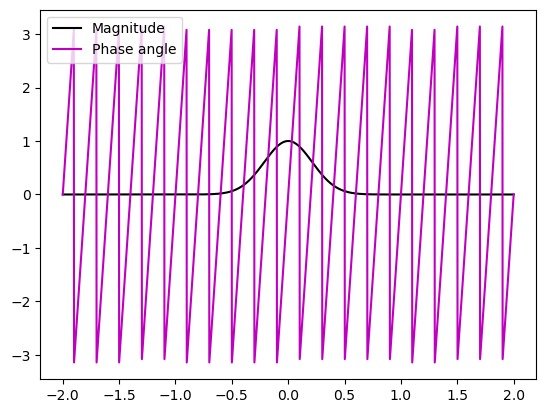

In [74]:
plt.plot(t, np.abs(y), 'k', label='Magnitude')
plt.plot(t, np.angle(y), 'm', label='Phase angle')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency (Hz)')

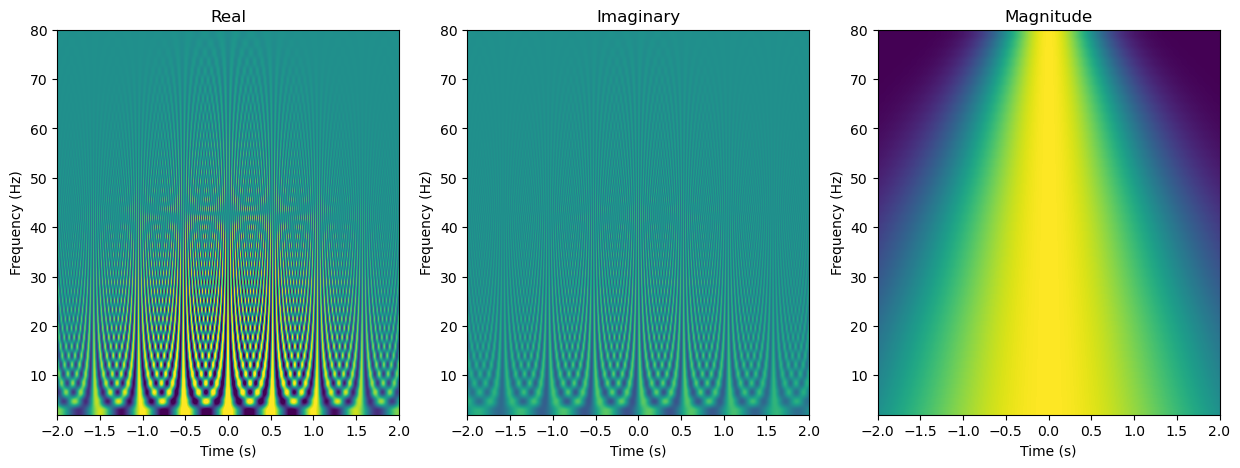

In [101]:
# Create a wave family

t = np.linspace(-2, 2, 4_001)
hz = np.linspace(2, 80, 42)
w_ = np.linspace(4, 1, 42)

real = np.zeros((len(hz), len(t)))
imag = np.zeros((len(hz), len(t)))
magn = np.zeros((len(hz), len(t)))

for i in range(len(hz)):
    f = hz[i]
    w = w_[i]
    y = createComplexValueWavelet(t, f, w)
    real[i,:] = np.real(y)
    imag[i,:] = np.imag(y)
    magn[i,:] = np.abs(y)

fig,ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(real, aspect='auto', origin='lower', extent=[t[0], t[-1], hz[0], hz[-1]], vmin=-.8, vmax=.8)
ax[0].set_title('Real')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Frequency (Hz)')

ax[1].imshow(imag, aspect='auto', origin='lower', extent=[t[0], t[-1], hz[0], hz[-1]], vmin=-2, vmax=2)
ax[1].set_title('Imaginary')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Frequency (Hz)')

ax[2].imshow(magn, aspect='auto', origin='lower', extent=[t[0], t[-1], hz[0], hz[-1]], vmin=0, vmax=1)
ax[2].set_title('Magnitude')
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Frequency (Hz)')